IMPORT THE NECESSARY LIBRARIES

In [71]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

IMPORT THE DATASET 

In [2]:
# import the dataset
df = pd.read_csv('wine_fraud.csv')

PERFROM EXPLORATORY DATA ANALYSIS

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [7]:
# What are the unique variables in the target label of interest
# Quality is the target label

df.quality.unique()
#OR
#df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

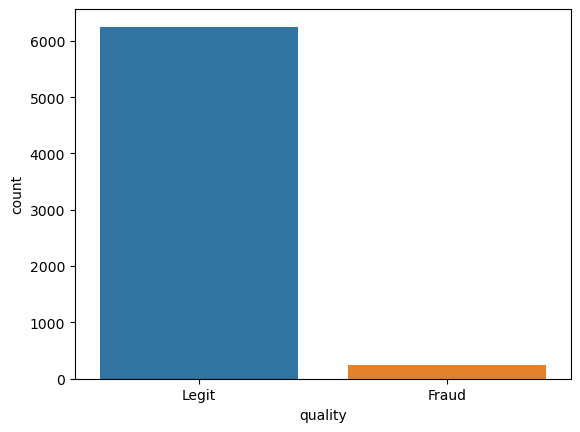

In [8]:
# Create a counter plot that displays the count per category of Legit vs Fraud
# Are the label/target  balanced or unbalanced?
sns.countplot(data=df, x='quality')

In [9]:
# there is way more legit quality than a fraud quality. Let us count them
# this would show if there is an inbalance
df.quality.value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

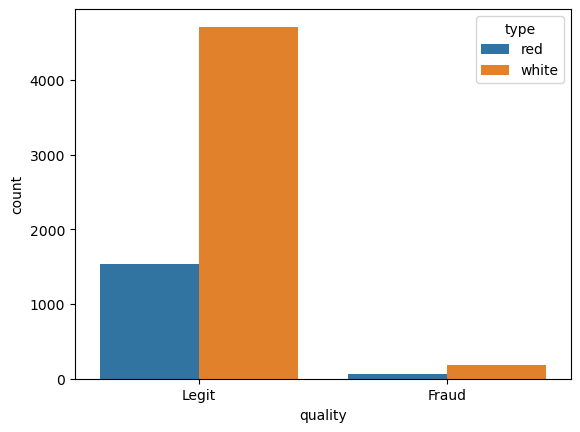

In [10]:
# when it comes to fraud, is there a difference between red and white wine?
sns.countplot(data=df, x='quality', hue='type')

In [21]:
#what percentage of red wines are fraud and what percentage of white wines are fraud
red_wines = df[df.type == 'red']
white_wines = df[df.type == 'white']

percent_fraud_red_wines = 100*(len(red_wines[red_wines.quality == 'Fraud'])/len(red_wines))
percent_fraud_white_wines = 100*(len(white_wines[white_wines.quality == 'Fraud'])/len(white_wines))

In [22]:
percent_fraud_red_wines 

3.9399624765478425

In [23]:
percent_fraud_white_wines

3.7362188648427925

PERFROM A MAPPING TO CONVERT THE OBJECT TYPE LABEL TO DIGIT OF 0 AND 1

In [26]:
# Create another column and map the objects from the quality column into it
df['Fraud'] = df.quality.map({'Legit':0, 'Fraud':1})

In [27]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white,0


In [29]:
df.corr()['Fraud'][0:-1]

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Name: Fraud, dtype: float64

In [30]:
df.corr()['Fraud'][0:-1].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Fraud, dtype: float64

<AxesSubplot:>

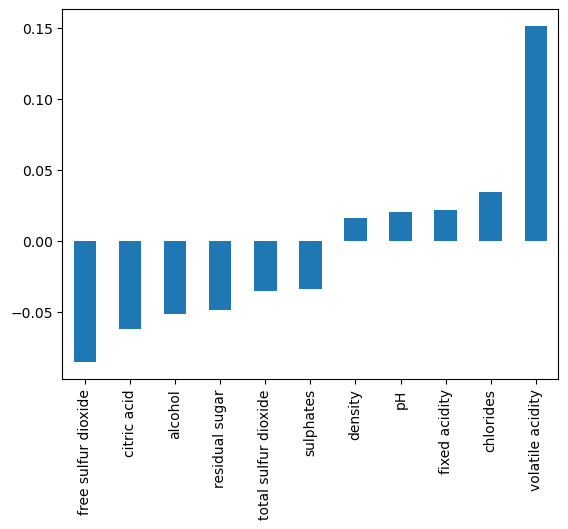

In [31]:
df.corr()['Fraud'][0:-1].sort_values().plot(kind='bar')

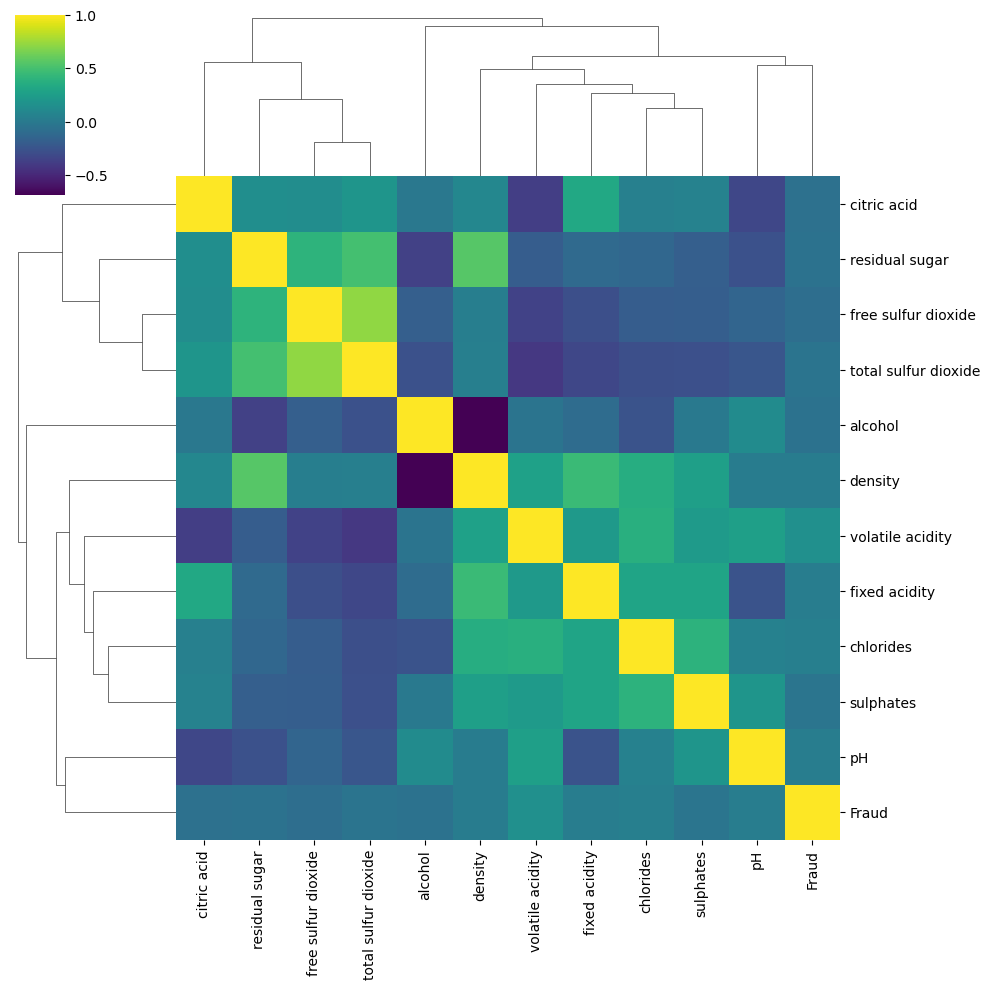

In [32]:
sns.clustermap(df.corr(), cmap='viridis')

MACHINE LEARNING MODEL

In [33]:
# Remove umwanted columns
df = df.drop('Fraud', axis=1)

In [34]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [35]:
# convert the categoricalcolumn type from string to dummy variables
df.type = pd.get_dummies(df.type, drop_first=True)

In [36]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,1


In [39]:
# seperate the features and label
X = df.drop('quality', axis=1)
y = df['quality']

In [40]:
# Perform train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.10, random_state=101)

In [41]:
# scale the X_train, and X_test
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) # to avoid data leak

In [58]:
# create an instance of the SVM Classifier
SVM_BASE_MODEL = SVC(class_weight='balanced')

In [59]:
SVM_BASE_MODEL

SVC(class_weight='balanced')

In [60]:
# create a parameter grid to serach for the best C and gamma parameter
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1], 
              'kernel':['linear','rbf','poly'], 
              'gamma':['string','auto']}

In [61]:
param_grid

{'C': [0.001, 0.01, 0.1, 0.5, 1],
 'kernel': ['linear', 'rbf', 'poly'],
 'gamma': ['string', 'auto']}

In [62]:
# build the SVM Grid Model
SVM_Grid_Model = GridSearchCV(SVM_BASE_MODEL,param_grid)

In [63]:
SVM_Grid_Model

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['string', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [64]:
# fit the grid model to the scaled X_Traqin data
SVM_Grid_Model.fit(scaled_X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 243, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'string' instead.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packag

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['string', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [65]:
# check to see the best parameters
SVM_Grid_Model.best_params_           

{'C': 0.001, 'gamma': 'auto', 'kernel': 'poly'}

In [67]:
# check the grid predictions
SVR_GRID_PRED =  SVM_Grid_Model.predict(scaled_X_test)

In [68]:
SVR_GRID_PRED

array(['Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Fraud', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Leg

In [69]:
# Display the confusin matrix and classification report
conf_matrix = confusion_matrix(y_test, SVR_GRID_PRED)

In [70]:
conf_matrix

array([[  7,  20],
       [ 15, 608]], dtype=int64)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


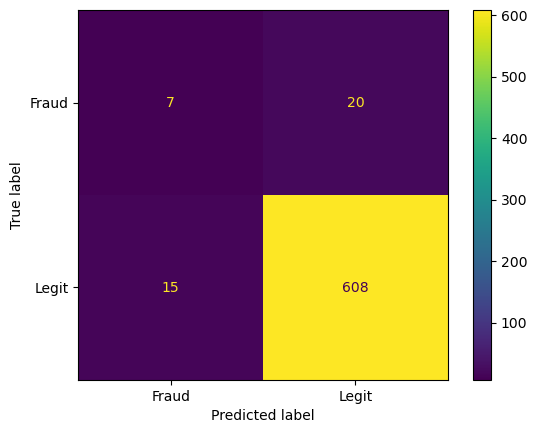

In [72]:
plot_confusion_matrix(SVM_Grid_Model,scaled_X_test,y_test)

In [73]:
# generate the classification report
print(classification_report(y_test, SVR_GRID_PRED))

              precision    recall  f1-score   support

       Fraud       0.32      0.26      0.29        27
       Legit       0.97      0.98      0.97       623

    accuracy                           0.95       650
   macro avg       0.64      0.62      0.63       650
weighted avg       0.94      0.95      0.94       650

